In [1]:
#%cd ..
%pwd
%cd ..
%pwd

/home/dusan/Desktop/ML_PROJECTS/git/StableDiffusion


'/home/dusan/Desktop/ML_PROJECTS/git/StableDiffusion'

In [ ]:
from stablediffusion.utils import model_loader
from stablediffusion.modules.pipeline import Pipeline
from PIL import Image
from pathlib import Path
from transformers import CLIPTokenizer
import torch

In [3]:
DEVICE = "cpu"

ALLOW_CUDA = False
ALLOW_MPS = False

if torch.cuda.is_available() and ALLOW_CUDA:
    DEVICE = "cuda"
elif (torch.has_mps or torch.backends.mps.is_available()) and ALLOW_MPS:
    DEVICE = "mps"
print(f"Using device: {DEVICE}")

Using device: cpu


/tmp/ipykernel_14583/1663714070.py:8: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  elif (torch.has_mps or torch.backends.mps.is_available()) and ALLOW_MPS:


In [4]:
tokenizer = CLIPTokenizer("./data/tokenizer_vocab.json", merges_file="./data/tokenizer_merges.txt")
model_file = "./data/v1-5-pruned-emaonly.ckpt"

In [5]:
models = model_loader.preload_models_from_standard_weights(model_file, DEVICE)

In [6]:
## IMAGE TO IMAGE

input_image = None
# Comment to disable image to image
image_path = "./images/dog.jpg"
# input_image = Image.open(image_path)
# Higher values means more noise will be added to the input image, so the result will further from the input image.
# Lower values means less noise is added to the input image, so output will be closer to the input image.
strength = 0.9

In [7]:
## TEXT TO IMAGE

# prompt = "A dog with sunglasses, wearing comfy hat, looking at camera, highly detailed, ultra sharp, cinematic, 100mm lens, 8k resolution."
prompt = "A cat stretching on the floor, highly detailed, ultra sharp, cinematic, 100mm lens, 8k resolution."
uncond_prompt = ""  # Also known as negative prompt
do_cfg = True
cfg_scale = 8  # min: 1, max: 14

100%|██████████| 50/50 [02:41<00:00,  3.24s/it]


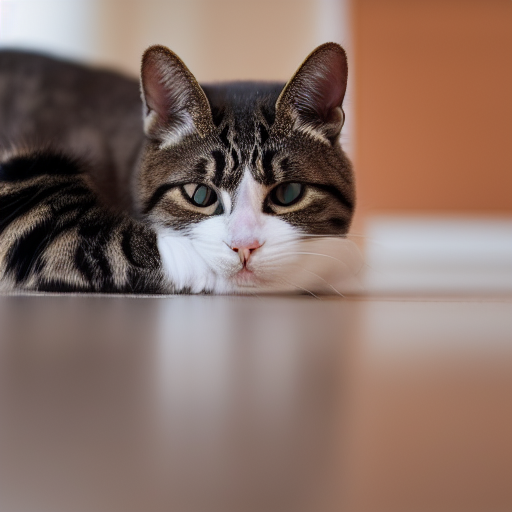

In [8]:
## SAMPLER

sampler = "ddpm"
num_inference_steps = 50
seed = 42

pipeline = Pipeline(models=models,tokenizer=tokenizer,device=DEVICE,idle_device="cpu")
output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
)

# Combine the input image and the output image into a single image.
Image.fromarray(output_image)